# Neighborhood Operations
## _A pixel is known by the neighborhood it keeps_

All our previous discussions focused on interpreting and manipulating images with respect to each pixel that constituted the image. It is a sound way of looking at the image and gives us many capabilities which we saw in all the previous notebooks.

However, this pixel oriented way of looking at an image lacks one aspect which is very important for any understanding of the real world. That aspect is **CONTEXT**. Let's see this using an example.

In [1]:
# Importing Libraries

import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading an Image

image = cv2.cvtColor(cv2.imread('..//assets//images//gurgaon-2.jpg'), cv2.COLOR_BGR2RGB)

Let's pick a specific pixel from an image we have not seen and try to guess what that pixel represents in the image. 

Shape of the pixel (1, 1, 3)


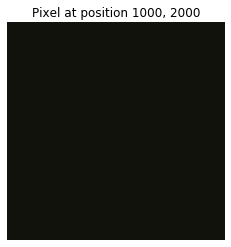

In [3]:
# Picking a specific pixel

pixel = image[1000, 2000, :].reshape((1, 1, 3))
print('Shape of the pixel {}'.format(pixel.shape))

plt.imshow(pixel)
plt.title('Pixel at position 1000, 2000')
plt.axis('off')
plt.show()

## Can We Take A Guess About Which Object Does This Pixel Belong To?

## But How Can We Answer This Question Without Seeing The Image?

Ok. I'll show you the image from which this pixel has been taken.

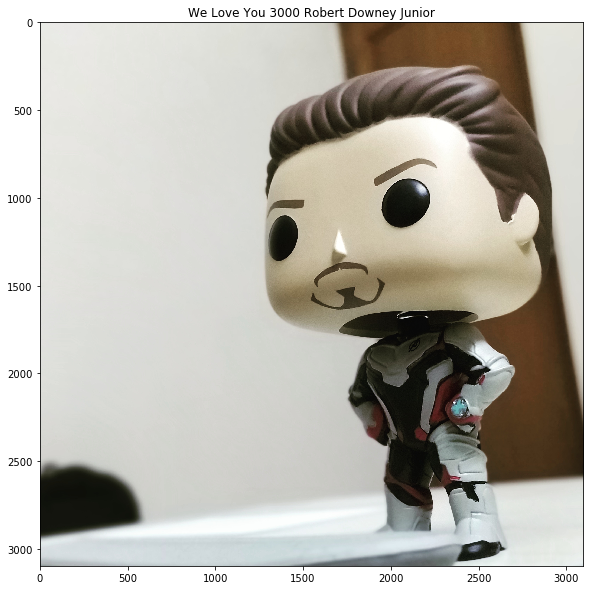

In [4]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))

plt.imshow(image)
plt.title('We Love You 3000 Robert Downey Junior')
# plt.axis('off')
plt.show()

Now that we have seen the image, let's pick a random sample from the image again and try to make the same guess again.

Shape of the pixel (1, 1, 3)


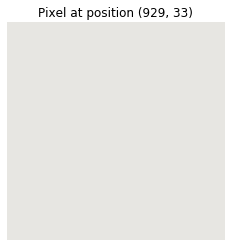

In [5]:
pos = (random.randint(0, image.shape[0]), random.randint(0, image.shape[1]))
pixel = image[pos[0], pos[1], :].reshape((1, 1, 3))
print('Shape of the pixel {}'.format(pixel.shape))

plt.imshow(pixel)
plt.title('Pixel at position {}'.format(pos))
plt.axis('off')
plt.show()

It's a pretty tough task to gauge any kind of imformation about what the pixel represent just by looking at a pixel from an image. Just by looking at 1 pixel, well we can only tell it's RGB values. 

While it is true that by looking at RGB values of all the pixels we can do lot of image processing, but any kind of intelligent interpretation of the image (ex: what does the image show? weather it is a cat image or a dog image?) demands us to observe part of an image in **context** with other parts.

This context is brought in when we analyze pixels along with their **neighborhood**. Let's see how that happens.

## Let's Expand Our Vision. What is a Neighborhood?

Neighborhood of a pixel is the group of pixel connected to or near the pixel. The figures below show examples of 3x3 and 5x5 neighorhoods.

<br/>

<figure>
    <img src="../assets/drawings/3neighborhood.jpg" width = 300px/>
    <figcaption style = "text-align:center">A 3x3 Neighborhood</figcaption>
</figure>

<br/>

<figure>
    <img src="../assets/drawings/5neighborhood.jpg" width = 500px/>
    <figcaption style = "text-align:center">A 5x5 Neighborhood</figcaption>
</figure>

Shape of the block 291


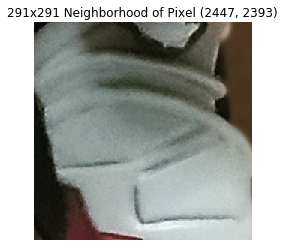

In [10]:
neigh = 291
lookup = int((neigh - 1)/2)
pixel = (random.randint(lookup, image.shape[0] - lookup), random.randint(lookup, image.shape[1] - lookup))

print('Shape of the block {}'.format(neigh, neigh))

block = image[pixel[0] - lookup:pixel[0] + lookup + 1, pixel[1] - lookup:pixel[1] + lookup + 1, :].reshape(neigh, neigh, 3)

plt.imshow(block)
plt.title('{}x{} Neighborhood of Pixel {}'.format(neigh, neigh, pixel))
plt.axis('off')
plt.show()

As we saw, when we increase our scope of seeing the image, the amount of information we can obtain from it increases. Not only the amount, but the quality of information also changes as we can derive more meaningful information from a larger context just by seeing it.

As humans we can easily see and understand the image, it's part and make associations between different parts in our mind. However, how can we make computers do the same? In order to make the computer **see & understand a neighborhood** of an image, we need to **perform some operations on the neighborhood**.

Examples of these operations can be our regular mathematical operators. Average, Maximum, Minimum, Differential, etc. 

##### Let's see how can we do these operations.

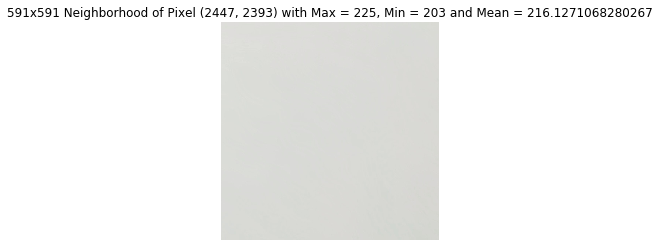

In [11]:
def getBlock(image, neigh):

    lookup = int((neigh - 1)/2)
    pixel = (random.randint(lookup, image.shape[0] - lookup), random.randint(lookup, image.shape[1] - lookup))
    block = image[pixel[0] - lookup:pixel[0] + lookup + 1, pixel[1] - lookup:pixel[1] + lookup + 1, :].reshape(neigh, neigh, 3)
    
    return block

neigh = 591
block = getBlock(image, neigh)

# Numpy provides us with convinient functions to perform operations on a N-D Numpy Array. let's use them.

maxima = np.max(block)
mean = np.mean(block)
minima = np.min(block)

plt.imshow(block)
plt.title('{}x{} Neighborhood of Pixel {} with Max = {}, Min = {} and Mean = {}'.format(neigh, neigh, pixel, 
                                                                                        maxima, minima, mean))
plt.axis('off')
plt.show()

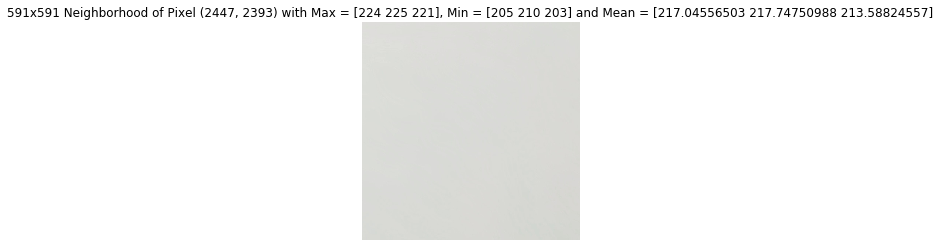

In [12]:
# Getting each statistic for RGB channels

maxima = np.max(block.reshape(block.shape[0]*block.shape[1], 3), axis = 0)
mean = np.mean(block.reshape(block.shape[0]*block.shape[1], 3), axis = 0)
minima = np.min(block.reshape(block.shape[0]*block.shape[1], 3), axis = 0)

plt.imshow(block)
plt.title('{}x{} Neighborhood of Pixel {} with Max = {}, Min = {} and Mean = {}'.format(neigh, neigh, pixel, 
                                                                                        maxima, minima, mean))
plt.axis('off')
plt.show()

Let's put this code in a function and try to get a bunch of samples together.

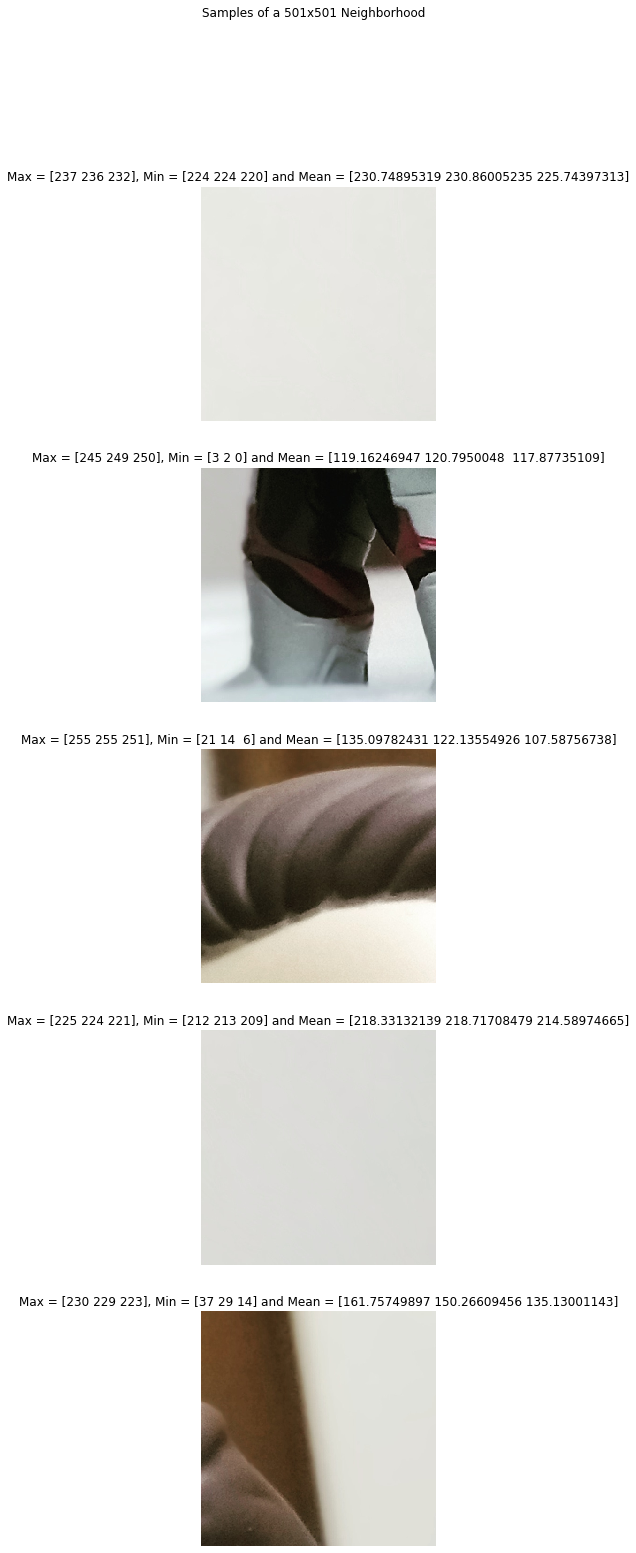

In [13]:
def getNeighborhoodStats(image, neigh):
    
    block = getBlock(image, neigh)
    
    maxima = np.max(block.reshape(-1, 3), axis = 0)
    mean = np.mean(block.reshape(-1, 3), axis = 0)
    minima = np.min(block.reshape(-1, 3), axis = 0)
    
    return block, [maxima, minima, mean]

neigh = 501

f, ax = plt.subplots(5, 1, figsize = (5, 25))
for i in range(5):
    sample = getNeighborhoodStats(image, neigh)
    
    ax[i].imshow(sample[0])
    ax[i].set_title('Max = {}, Min = {} and Mean = {}'.format(sample[1][0], sample[1][1], sample[1][2]))
    ax[i].axis('off')

f.suptitle('Samples of a {}x{} Neighborhood'.format(neigh, neigh))
plt.show()
    


Multiple runs of the above code show that we can get different statistics for different blocks of an image. These statistics give us an idea of some local properties of the image. **Local to the neighborhood** which we are observing. How can we connect these local properties to the complete image?

**What if put these statistics together to form another matrix?**. Let's see how can we do that.

Essentially by taking these statistics from a block of an image we are **converting that block to a vector similar to a pixel**.

<br/>

<figure>
    <img src="../assets/drawings/operationonneigh.jpg" width = 500px/>
    <figcaption style = "text-align:center">Operation on a Neighborhood</figcaption>
</figure>

**With many blocks we get many pixels, with many adjacent blocks we get many adjacent pixels and by combining these pixels in a matrix we make a new image. Let's see this in action**.

In [14]:
from tqdm import tqdm_notebook

In [15]:
def getImageAfterNeighOperation(image, neigh, op = np.mean):
    
    lookup = int((neigh - 1)/2)
    
    new_pixels = []
    for i in tqdm_notebook(range(lookup, image.shape[0] - lookup), total = image.shape[0] - 2*lookup):
        new_row = []
        for j in range(lookup, image.shape[1] - lookup):
            block = image[i - lookup: i + lookup +1, j - lookup: j + lookup +1]
            new_row.append(op(block.reshape(block.shape[0]*block.shape[1], 3), axis = 0))
        new_pixels.append(new_row)
    
    new_image = np.array(new_pixels)
    new_shape = new_image.shape
    new_image = new_image.reshape(-1, 3)
    new_image = new_image/np.max(new_image, axis = 0)
    print('Output Image Size {}'.format(new_shape))
    
    return new_image.reshape(new_shape)

def rowPlot(images, subtitles, title):
    
    f, ax = plt.subplots(1, len(images), figsize = (5*len(images), 5))
    for i, (x, im) in enumerate(zip(ax, images)):
        if(len(im.shape) == 3):
            x.imshow(im)
        else:
            x.imshow(im, cmap = 'gray')
        x.set_title(subtitles[i])
#         x.axis('off')

    f.suptitle(title)
    plt.show()

In [16]:
image_ = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
print(image_.shape)

(310, 310, 3)


In [17]:
new_image = getImageAfterNeighOperation(image_, 51)

e:\envs\py36tf\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Output Image Size (260, 260, 3)


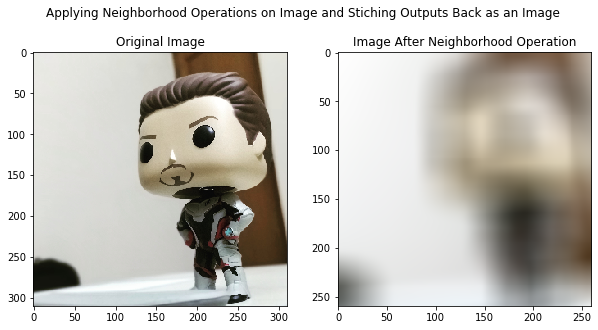

In [18]:
rowPlot([image_, new_image],
        ['Original Image', 'Image After Neighborhood Operation'],
        'Applying Neighborhood Operations on Image and Stiching Outputs Back as an Image')

This can be a lot to wrap our heads around it. Let's dive in and see what's happening using a Matplotlib Animation.

In [ ]:
%matplotlib notebook
import matplotlib.animation as animation

neigh = 51
lookup = int((neigh - 1)/2)
new_shape = (image_.shape[0] - neigh + 1, image_.shape[1] - neigh + 1, 3)

new_image = np.ones(new_shape)

fig, ax = plt.subplots(1, 2)

im1 = ax[0].imshow(image_, animated=True, interpolation = 'bicubic')
im2 = ax[1].imshow(new_image, animated=True, interpolation = 'bicubic')

indx = lookup*image_.shape[1] + lookup

def updatefig(*args):
    
    global image, indx, neigh, lookup
    i = int(np.floor(indx/image_.shape[1]))
    j = int(indx%image_.shape[1])
    
    im_ = image.copy()
    
    start_point = (j - lookup, i - lookup) 
    end_point = (j + lookup + 1, i + lookup + 1) 
    
    if start_point[0] >= 0 and start_point[1] >= 0 and end_point[0] < image.shape[0] - neigh and  end_point[1] < image.shape[1] - neigh:
        
        # Blue color in BGR 
        color = (255, 0, 0) 

        # Line thickness of 2 px 
        thickness = 10

        # Using cv2.rectangle() method 
        # Draw a rectangle with blue line borders of thickness of 2 px 
        im_rect = cv2.rectangle(im_, start_point, end_point, color, thickness)
        new_image[i, j, :] = np.mean(image[start_point[0]:end_point[0], start_point[1]:end_point[1]].reshape(-1, 3), axis = 0)
        
        im1.set_array(im_rect)
        
    else:
        im1.set_array(image_)
    
    im2.set_array(new_image)
        
    indx+=1
        
    return (im1, im2),

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=False)
plt.show()

The above animation shows how a new image is derived when we repeatedly perform neighborhood operations on adjacent neighborhoods of an image and stitch the resultant pixels together.

In the example we saw how mean operation produces a blured image from the original one. And we also saw a blue matrix sliding over the image. This blue matrix is nothing but a 2D array of shape (neigh X neigh) all filled with 1/(neigh X neigh) so that it can create average of the pixels it slides over.

We saw that by changing the operation in the function we could change the output image this means that by changing the constituent of this blue matrix we can change the output. This neighborhood matrix is called **Kernel** and we can slide this kernel and provide an operation based on the **weights** of this kernel (matrix cell constituents) to get a resultant image. 

This operation and this visualization is a simple example and demo of the great **CONVOLUTIONAL OPERATION**. 

## Convolution Operation - The Basic Building Block of CNNs

**Interesting Read**:

- [Image Kernels](https://setosa.io/ev/image-kernels/)
- [The Convolution Operation](https://medium.com/@prvnk10/the-convolution-operation-48d72a382f5a)
- [Convolutions with OpenCV and Python](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)
- [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)

I have tried to give an intuitive and organic motivation of convolution operation. However, the articles mentioned above are worth reading. 

In a 2D convolution operation a small matrix called **kernel** is slided over an **image** and for each slide some operation is performed between the kernel and the image (sort of an element wise matrix multiplication). The resultant image vectors of this operation when stitched together in 2D create a **resultant image** which is **smaller in dimensions** than the original one.

The relation between the dimension of the resultant image and the original one is:

$W' = \frac{W - w + 2P}{S} + 1$, $H' = \frac{H - h + 2P}{S} + 1$

Where,

$W', H'$: are the width and height of the resultant image

$W, H$: are the width and height of the original image

$w, h$: are the width and height of the kernel. This is equal to the neighborhood in our previous examples

$P$: is padding. Padding is the number of pixels by which the original image is augmented to keep the size of the resultant image same.

$S$: is stride. Stride is the number of pixels the kernel moves in each slide.